<a href="https://colab.research.google.com/github/gokhanozbek/reservoir-characteristics/blob/master/HW3%20Last%20Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

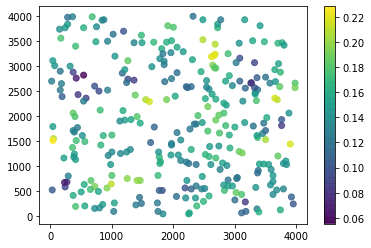

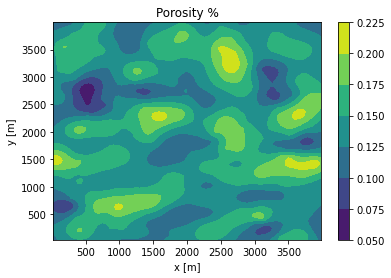

In [56]:
from pylab import *
import numpy as np
from pandas import DataFrame, Series
from scipy.spatial.distance import pdist, squareform
import pandas as pd
import io
from google.colab import files
from geovariogram import variogram

#uploaded = files.upload()
 

class kriging():

    def __init__(self,obs):

        self.x = X
        self.y = Y
        self.z = Z
        
        self.f = F

        self.type = obs.type
        self.nugget = obs.nugget
        self.sill = obs.sill
        self.range = obs.range
        
        variogram.set_distance(self)
        variogram.set_theoretical(self)

        self.covariance = self.sill-self.theoretical


    def simple(self,est):

        x_T = np.reshape(self.x,(-1,1))
        y_T = np.reshape(self.y,(-1,1))
        z_T = np.reshape(self.z,(-1,1))

        f_T = np.reshape(self.f,(-1,1))

        est.distance = np.sqrt((x_T-est.X)**2+(y_T-est.Y)**2+(z_T-est.Z)**2)

        est.type = self.type
        est.nugget = self.nugget
        est.sill = self.sill
        est.range = self.range

        variogram.set_theoretical(est)
        
        est.covariance = est.sill-est.theoretical

        est.lambdas = np.linalg.solve(self.covariance,est.covariance)

        est.F = est.mean+(est.lambdas*(f_T-est.mean)).sum(axis=0)
        est.F_variance = self.sill-(est.lambdas*est.covariance).sum(axis=0)
        
        return est
if __name__ == "__main__":
    class observation: pass
    class estimation: pass



    data = pd.read_csv(io.BytesIO(uploaded['observation.csv']), skiprows=2,)
    data = np.array( data, dtype=np.float, )
    
    X = data[:,0]
    Y = data[:,1]
    Z = data[:,2]
    F = data[:,3]
    plt.figure(1)

    plt.scatter(X,Y,c=F,alpha=0.8)
    plt.colorbar()
    plt.show()

    xlabel('x [m]')
    ylabel('y [m]')
    
    title('Porosity %') ;
      

    observation.X = data[:,0]
    observation.Y = data[:,1]
    observation.Z = data[:,2]
    
    observation.F = data[:,3]

    observation.type = 'spherical'
    observation.nugget = 0
    observation.sill = 0.001
    observation.range = 500
    
    xmin = X.min();
    xmax = X.max();

    ymin = Y.min();
    ymax = Y.max();

    Nx = 100;
    Ny = 100;

    Xlin = np.linspace(xmin,xmax,Nx).T
    Ylin = np.linspace(ymin,ymax,Ny).T
    
    [Xmesh,Ymesh] = np.meshgrid(Xlin,Ylin);
      
    Z_array=np.ones((Nx*Ny), dtype=int)

    estimation.X = Xmesh.flatten()
    estimation.Y = Ymesh.flatten()
    estimation.Z = Z_array
    estimation.mean = 0.12



    krig = kriging(observation)
    krig.simple(estimation)

    
    Fmesh  = np.reshape(estimation.F, (Nx,Ny))
    Fmeshv = np.reshape(estimation.F_variance,(Nx,Ny))
    
    plt.contourf(Xmesh,Ymesh,Fmesh);
    plt.colorbar()
    plt.show()
    
    